<a href="https://colab.research.google.com/github/Brugen-git/Neural-Networks-Code/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [7]:
# loading the dataset
(trainX, trainy), (testX, testy) =keras.datasets.fashion_mnist.load_data()
print("Train x= %s, y=%s"%(trainX.shape,trainy.shape))
print("Test x= %s, y=%s"%(testX.shape,testy.shape))



Train x= (60000, 28, 28), y=(60000,)
Test x= (10000, 28, 28), y=(10000,)


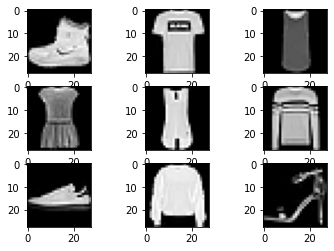

In [8]:
#showing first 9 training samples
def plot_samples(trainX):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(trainX[i],cmap='gray')
  plt.show()
plot_samples(trainX)

In [9]:
# Since our training and test dataset is 3-D we put another extra dimension
trainX=trainX.reshape(trainX.shape[0],28,28,1)
testX=testX.reshape(testX.shape[0],28,28,1)

trainY= tf.keras.utils.to_categorical(trainy)
testY= tf.keras.utils.to_categorical(testy)

In [10]:
# changing pixel values
trainX= trainX.astype('float32') / 255.0
testX= testX.astype('float32') / 255.0
print("Train x= %s, y=%s"%(trainX.shape,trainy.shape))
print("Test x= %s, y=%s"%(testX.shape,testy.shape))

Train x= (60000, 28, 28, 1), y=(60000,)
Test x= (10000, 28, 28, 1), y=(10000,)


In [15]:
#defining the model 
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# fitting the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)


Epoch 1/10
1875/1875 - 25s - loss: 0.4786 - accuracy: 0.8278 - val_loss: 0.3461 - val_accuracy: 0.8773 - 25s/epoch - 13ms/step
Epoch 2/10
1875/1875 - 24s - loss: 0.3087 - accuracy: 0.8887 - val_loss: 0.3123 - val_accuracy: 0.8836 - 24s/epoch - 13ms/step
Epoch 3/10
1875/1875 - 24s - loss: 0.2612 - accuracy: 0.9044 - val_loss: 0.2905 - val_accuracy: 0.8984 - 24s/epoch - 13ms/step
Epoch 4/10
1875/1875 - 24s - loss: 0.2351 - accuracy: 0.9128 - val_loss: 0.2817 - val_accuracy: 0.8975 - 24s/epoch - 13ms/step
Epoch 5/10
1875/1875 - 24s - loss: 0.2111 - accuracy: 0.9220 - val_loss: 0.2625 - val_accuracy: 0.9087 - 24s/epoch - 13ms/step
Epoch 6/10
1875/1875 - 24s - loss: 0.1892 - accuracy: 0.9298 - val_loss: 0.2719 - val_accuracy: 0.9010 - 24s/epoch - 13ms/step
Epoch 7/10
1875/1875 - 24s - loss: 0.1731 - accuracy: 0.9354 - val_loss: 0.2653 - val_accuracy: 0.9095 - 24s/epoch - 13ms/step
Epoch 8/10
1875/1875 - 24s - loss: 0.1569 - accuracy: 0.9414 - val_loss: 0.2811 - val_accuracy: 0.9048 - 24s/ep

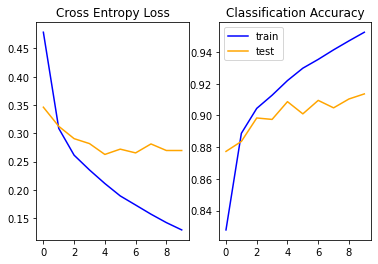

In [26]:
#plotting the results
def plot_results(history):
      # plot loss
      plt.subplot(121)
      plt.title('Cross Entropy Loss')
      plt.plot(history.history['loss'], color='blue', label='train')
      plt.plot(history.history['val_loss'], color='orange', label='test')
      # plot accuracy
      plt.subplot(122)
      plt.title('Classification Accuracy')
      plt.plot(history.history['accuracy'], color='blue', label='train')
      plt.plot(history.history['val_accuracy'], color='orange', label='test')
      plt.legend()
      plt.show()

plot_results(history)

In [28]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 9.900
